## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [1]:
# Use this cell to begin your analysis, and add as many as you would like!

# Import pandas and matplotlib.pyplot
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in the csv as a DataFrame
office_df = pd.read_csv('datasets/office_episodes.csv', parse_dates=['release_date'])
office_df.info()
office_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   episode_number  188 non-null    int64         
 1   season          188 non-null    int64         
 2   episode_title   188 non-null    object        
 3   description     188 non-null    object        
 4   ratings         188 non-null    float64       
 5   votes           188 non-null    int64         
 6   viewership_mil  188 non-null    float64       
 7   duration        188 non-null    int64         
 8   release_date    188 non-null    datetime64[ns]
 9   guest_stars     29 non-null     object        
 10  director        188 non-null    object        
 11  writers         188 non-null    object        
 12  has_guests      188 non-null    bool          
 13  scaled_ratings  188 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(3), int64(4), objec

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.20,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.00,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.80,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.40,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.00,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,183,9,Stairmageddon,Dwight shoots Stanley with a bull tranquilizer...,8.0,1985,3.83,22,2013-04-11,NaN,Matt Sohn,Dan Sterling,False,0.43750
184,184,9,Paper Airplane,The employees hold a paper airplane competitio...,8.0,2007,3.25,22,2013-04-25,NaN,Jesse Peretz,Halsted Sullivan | Warren Lieberstein,False,0.43750
185,185,9,Livin' the Dream,Dwight becomes regional manager after Andy qui...,9.0,2831,3.51,42,2013-05-02,Michael Imperioli,Jeffrey Blitz,Niki Schwartz-Wright,True,0.75000
186,186,9,A.A.R.M.,Dwight prepares for a marriage proposal and hi...,9.5,3914,4.56,43,2013-05-09,NaN,David Rogers,Brent Forrester,False,0.90625


In [3]:
# Initiatlize two empty lists
cols = []
sizes = []

In [4]:
# Iterate through the DataFrame, and assign colors based on the rating
for ind, row in office_df.iterrows():
    if row['scaled_ratings'] < 0.25:
        cols.append('red')
    elif row['scaled_ratings'] < 0.50:
        cols.append('orange')
    elif row['scaled_ratings'] < 0.75:
        cols.append('lightgreen')
    else:
        cols.append('darkgreen')

cols

['orange',
 'lightgreen',
 'orange',
 'orange',
 'lightgreen',
 'orange',
 'lightgreen',
 'orange',
 'lightgreen',
 'lightgreen',
 'orange',
 'orange',
 'lightgreen',
 'orange',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'darkgreen',
 'lightgreen',
 'orange',
 'orange',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'orange',
 'lightgreen',
 'lightgreen',
 'darkgreen',
 'darkgreen',
 'orange',
 'lightgreen',
 'orange',
 'orange',
 'orange',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'orange',
 'orange',
 'lightgreen',
 'lightgreen',
 'darkgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'darkgreen',
 'darkgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'orange',
 'lightgreen',
 'darkgreen',
 'orange',
 'lightgreen',
 'lightgreen',
 'orange',
 'darkgreen',
 'lightgreen',
 'lightgreen',
 'orange',
 'orange',
 'orange',
 'lightgreen',
 'orange',
 'lightgreen',
 'lightgr

In [5]:
# Iterate through the DataFrame, and assign a size based on whether it has guests        
for ind, row in office_df.iterrows():
    if row['has_guests'] == False:
        sizes.append(25)
    else:
        sizes.append(250)

sizes

[25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 250,
 250,
 25,
 25,
 250,
 25,
 250,
 25,
 250,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 250,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 250,
 250,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 250,
 25,
 250]

In [6]:
# For ease of plotting, add our lists as columns to the DataFrame
office_df['colors'] = cols
office_df['sizes'] = sizes

office_df.info()
office_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   episode_number  188 non-null    int64         
 1   season          188 non-null    int64         
 2   episode_title   188 non-null    object        
 3   description     188 non-null    object        
 4   ratings         188 non-null    float64       
 5   votes           188 non-null    int64         
 6   viewership_mil  188 non-null    float64       
 7   duration        188 non-null    int64         
 8   release_date    188 non-null    datetime64[ns]
 9   guest_stars     29 non-null     object        
 10  director        188 non-null    object        
 11  writers         188 non-null    object        
 12  has_guests      188 non-null    bool          
 13  scaled_ratings  188 non-null    float64       
 14  colors          188 non-null    object        
 15  sizes 

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings,colors,sizes
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.20,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125,orange,25
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.00,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125,lightgreen,25
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.80,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500,orange,25
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.40,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875,orange,25
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.00,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250,lightgreen,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,183,9,Stairmageddon,Dwight shoots Stanley with a bull tranquilizer...,8.0,1985,3.83,22,2013-04-11,NaN,Matt Sohn,Dan Sterling,False,0.43750,orange,25
184,184,9,Paper Airplane,The employees hold a paper airplane competitio...,8.0,2007,3.25,22,2013-04-25,NaN,Jesse Peretz,Halsted Sullivan | Warren Lieberstein,False,0.43750,orange,25
185,185,9,Livin' the Dream,Dwight becomes regional manager after Andy qui...,9.0,2831,3.51,42,2013-05-02,Michael Imperioli,Jeffrey Blitz,Niki Schwartz-Wright,True,0.75000,darkgreen,250
186,186,9,A.A.R.M.,Dwight prepares for a marriage proposal and hi...,9.5,3914,4.56,43,2013-05-09,NaN,David Rogers,Brent Forrester,False,0.90625,darkgreen,25


In [7]:
# Split data into guest and non_guest DataFrames
non_guest_df = office_df[office_df['has_guests'] == False]
non_guest_df.info()
non_guest_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 0 to 186
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   episode_number  159 non-null    int64         
 1   season          159 non-null    int64         
 2   episode_title   159 non-null    object        
 3   description     159 non-null    object        
 4   ratings         159 non-null    float64       
 5   votes           159 non-null    int64         
 6   viewership_mil  159 non-null    float64       
 7   duration        159 non-null    int64         
 8   release_date    159 non-null    datetime64[ns]
 9   guest_stars     0 non-null      object        
 10  director        159 non-null    object        
 11  writers         159 non-null    object        
 12  has_guests      159 non-null    bool          
 13  scaled_ratings  159 non-null    float64       
 14  colors          159 non-null    object        
 15  sizes 

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings,colors,sizes
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.20,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125,orange,25
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.00,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125,lightgreen,25
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.80,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500,orange,25
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.40,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875,orange,25
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.00,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250,lightgreen,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,180,9,Moving On,"Andy finds out that Erin dumped him for Pete, ...",8.1,2089,4.06,42,2013-02-14,NaN,Jon Favreau,Graham Wagner,False,0.46875,orange,25
181,181,9,The Farm,Show follows Dwight Schrute a beet farmer runn...,7.5,2189,3.54,22,2013-03-14,NaN,Paul Lieberstein,Paul Lieberstein,False,0.28125,orange,25
183,183,9,Stairmageddon,Dwight shoots Stanley with a bull tranquilizer...,8.0,1985,3.83,22,2013-04-11,NaN,Matt Sohn,Dan Sterling,False,0.43750,orange,25
184,184,9,Paper Airplane,The employees hold a paper airplane competitio...,8.0,2007,3.25,22,2013-04-25,NaN,Jesse Peretz,Halsted Sullivan | Warren Lieberstein,False,0.43750,orange,25


In [8]:
guest_df = office_df[office_df['has_guests'] == True]
guest_df.info()
guest_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 5 to 187
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   episode_number  29 non-null     int64         
 1   season          29 non-null     int64         
 2   episode_title   29 non-null     object        
 3   description     29 non-null     object        
 4   ratings         29 non-null     float64       
 5   votes           29 non-null     int64         
 6   viewership_mil  29 non-null     float64       
 7   duration        29 non-null     int64         
 8   release_date    29 non-null     datetime64[ns]
 9   guest_stars     29 non-null     object        
 10  director        29 non-null     object        
 11  writers         29 non-null     object        
 12  has_guests      29 non-null     bool          
 13  scaled_ratings  29 non-null     float64       
 14  colors          29 non-null     object        
 15  sizes  

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings,colors,sizes
5,5,1,Hot Girl,Michael is just one of the many male staff who...,7.7,3854,4.80,23,2005-04-26,Amy Adams,Amy Heckerling,Mindy Kaling,True,0.34375,orange,250
8,8,2,Office Olympics,"Ready to finalize his deal for a new condo, Mi...",8.4,3665,8.30,22,2005-10-04,Nancy Carell,Paul Feig,Michael Schur,True,0.56250,lightgreen,250
9,9,2,The Fire,A fire in the kitchen relegates the staff to t...,8.4,3607,7.60,22,2005-10-11,Amy Adams,Ken Kwapis,B. J. Novak,True,0.56250,lightgreen,250
12,12,2,The Client,With Michael and Jan Levinson-Gould away from ...,8.6,3533,7.50,22,2005-11-08,Tim Meadows,Greg Daniels,Paul Lieberstein,True,0.62500,lightgreen,250
14,14,2,E-Mail Surveillance,Michael decides to set up e-mail surveillance ...,8.4,3338,8.10,23,2005-11-22,Ken Jeong,Paul Feig,Jennifer Celotta,True,0.56250,lightgreen,250
16,16,2,Booze Cruise,"The Dunder Mifflin staff go on a mandatory ""bo...",8.6,3536,8.70,22,2006-01-05,Rob Riggle,Ken Kwapis,Greg Daniels,True,0.62500,lightgreen,250
21,21,2,Valentine's Day,When Michael visits Dunder Mifflin corporate h...,8.3,3104,8.95,22,2006-02-09,Conan O'Brien,Greg Daniels,Michael Schur,True,0.53125,lightgreen,250
29,29,3,The Convention,Michael and Dwight go to a convention in Phila...,8.2,3027,7.78,22,2006-09-28,Jerome Bettis,Ken Whittingham,Gene Stupnitsky | Lee Eisenberg,True,0.50000,orange,250
53,53,4,Launch Party,The Dunder Mifflin Infinity website is launchi...,8.4,2844,8.91,42,2007-10-11,Kevin McHale,See full summary,Jennifer Celotta,True,0.56250,lightgreen,250
66,66,5,Business Ethics,A confession at an H.R. business ethics semina...,8.3,2654,8.99,22,2008-10-09,Wendi McLendon-Covey,Jeffrey Blitz,Ryan Koh,True,0.53125,lightgreen,250


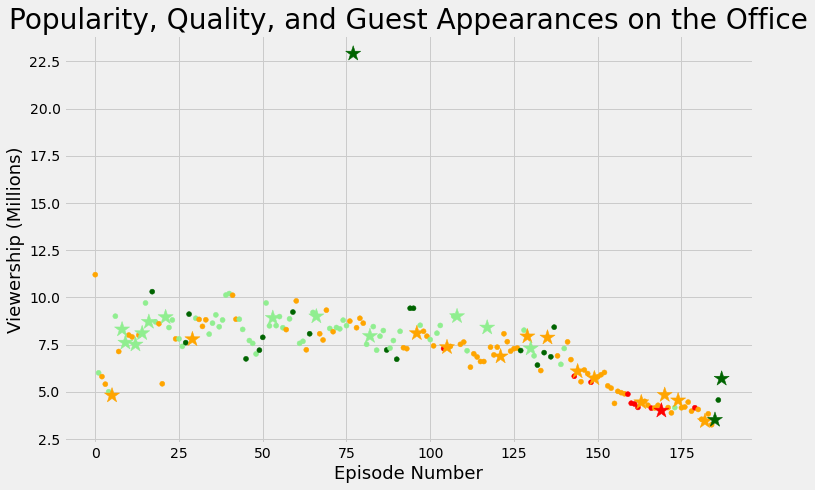

In [9]:
# Set the figure size and plot style        
plt.rcParams['figure.figsize'] = [11, 7]
plt.style.use('fivethirtyeight')

# Create the figure
fig = plt.figure()

# Create two scatter plots with the episode number on the x axis, and the viewership on the y axis

# Create a normal scatter plot for regular episodes
plt.scatter(x=non_guest_df.episode_number, y=non_guest_df.viewership_mil, \
                 # Assign our color list as the colors and set marker and size
                 c=non_guest_df['colors'], s=25)

# Create a starred scatterplot for guest star episodes
plt.scatter(x=guest_df.episode_number, y=guest_df.viewership_mil, \
                 # Assign our color list as the colors and set marker and size
                 c=guest_df['colors'], marker='*', s=250)

# Create a title
plt.title("Popularity, Quality, and Guest Appearances on the Office", fontsize=28)

# Create an x-axis label
plt.xlabel("Episode Number", fontsize=18)

# Create a y-axis label
plt.ylabel("Viewership (Millions)", fontsize=18)

# Show the plot
plt.show()

In [10]:
# Get the most popular guest star
print(office_df[office_df['viewership_mil'] > 20]['guest_stars'])

77    Cloris Leachman, Jack Black, Jessica Alba
Name: guest_stars, dtype: object


In [11]:
top_star = 'Jessica Alba'